# Neale diseases genes (Pascal) and vascular phenotypes genes (Pascal)

###### First version 17/06/2022
###### Latest modif 31/07/2023

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
from matplotlib.colors import LogNorm, Normalize

DATE = datetime.now().strftime("%Y-%m-%d")

In [56]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
ventile_num='Zekavat'
#date_used='2022_11_23' #'2022_08_17'
#directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/'+str(date_used)+'_'+str(ventile_num) +'/'
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'
directory_diseases_neale_pascal = '/HDD/data/ukbb/disease_sumstats/VARIANTS/'
#'/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/'  #2022_11_23_covar_fix/'
#save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
all_files = list(MAIN_LABELS.split(","))
all_files_new = list(MAIN_NAMES.split(","))

path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'

In [57]:
only_continuos = False # True
only_True_and_True_only = True 


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv(f'~/retina-phenotypes/complementary/{file_info_name}')
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['pascal_analysis']!='NOT_AVAILABLE']
print('len(df_inf_filt):', len(df_inf_filt))


if only_continuos:
    df_inf_filt =  df_inf_filt[(df_inf_filt['dtype'] == 'con') | (df_inf_filt['dtype'] == 'cat')]
    print('len(df_inf_filt):', len(df_inf_filt))
    df_inf_filt = df_inf_filt[df_inf_filt['name_LR'] != 'N_cigarettes_curr_daily_both']

#print(df_inf_filt['pascal_analysis'].value_counts())

if only_True_and_True_only:
    df_inf_filt = df_inf_filt[((df_inf_filt['pascal_analysis'] == 'TRUE') | (df_inf_filt['pascal_analysis'] == 'TRUE_only') | (df_inf_filt['pascal_analysis'] == 'TRUE_only_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'TRUE_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'included_NO_GENES')) & (df_inf_filt['lscr_analysis'] == 'TRUE')]
    print('len(df_inf_filt):', len(df_inf_filt))

diseases_traits_old = list(df_inf_filt['datafield'].values)
diseases_traits_new = list(df_inf_filt['final_name'].values)

len(df_inf_csv): 89
len(df_inf_filt): 74
len(df_inf_filt): 20


In [58]:
df_inf_filt

,category,subcategory,main_supl,name_LR,name_cox,dtype,N_cases_LR_cox,round_N_cases_LR_cox,final_name_aux,final_name,datafield,Neale_ldsr,Neale_gwas,Details,lscr_analysis,N_cases_ldsr,pascal_analysis,N_cases_ss,pascalcross_analysis,Neale_GWAS
0,risk factor,BP,main,DBP_both,NaN,con,68588,(68.5k),DBP,DBP,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv,only_rs_notna_mod_variants_4079_irnt.gwas.impu...,NaN,TRUE,340162,TRUE_only,NaN,NaN,linear_reg
1,risk factor,BP,main,SBP_both,NaN,con,68588,(68.5k),SBP,SBP,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv,only_rs_notna_mod_variants_4080_irnt.gwas.impu...,NaN,TRUE,340159,TRUE_only,NaN,NaN,linear_reg
3,risk factor,BP,NaN,NaN,NaN,bin,NaN,NaN,High blood pressure (6150_4),Hypertension *,6150_4,6150_4.ldsc.imputed_v3.both_sexes.tsv,qc_only_rs_notna_mod_variants_6150_4.gwas.impu...,NaN,TRUE,360420,TRUE,NaN,NaN,linear_reg
4,risk factor,Pulse,main,PR_both,NaN,con,68588,(68.5k),PR,PR,102,102_irnt.ldsc.imputed_v3.both_sexes.tsv,only_rs_notna_mod_variants_102_irnt.gwas.imput...,NaN,TRUE,340162,TRUE_only,NaN,NaN,linear_reg
5,risk factor,Pulse,main,pulse_wave_arterial_stiffness_index_both,NaN,con,68170,(68.1k),Pulse wave ASI,PWASI,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv,only_rs_notna_mod_variants_21021_irnt.gwas.imp...,NaN,TRUE,118469,TRUE_only,NaN,NaN,linear_reg
6,risk factor,Cholesterol,main,HDL_cholesterol_both,NaN,con,59853,(59.8k),HDL cholesterol,HDL,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv,only_rs_notna_mod_variants_30760_irnt.gwas.imp...,NaN,TRUE,315133,TRUE_only_BUT_GENE_SCORING_INCOMPLETE,NaN,NaN,linear_reg
7,risk factor,Cholesterol,main,LDL_direct_both,NaN,con,63492,(63.4k),LDL direct,LDL,30780,30780_irnt.imputed_v3.ldsc.both_sexes.tsv,only_rs_notna_mod_variants_30780_irnt.gwas.imp...,NaN,TRUE,343621,TRUE_only_BUT_GENE_SCORING_INCOMPLETE,NaN,NaN,linear_reg
8,risk factor,Cholesterol,main,Triglycerides_both,NaN,con,63550,(63.5k),Triglycerides,Triglycerides,30870,30870_irnt.imputed_v3.ldsc.both_sexes.tsv,only_rs_notna_mod_variants_30870_irnt.gwas.imp...,NaN,TRUE,343992,TRUE_only_BUT_GENE_SCORING_INCOMPLETE,NaN,NaN,linear_reg
9,risk factor,Cholesterol,main,HbA1c_both,NaN,con,61130,(61.1k),HbA1c,HbA1c,30750,30750_irnt.imputed_v3.ldsc.both_sexes.tsv,only_rs_notna_mod_variants_30750_irnt.gwas.imp...,NaN,TRUE,344182,TRUE_only,NaN,NaN,linear_reg
10,risk factor,Alcohol,main,alcohol_intake_frequency_both,NaN,cat,68690,(68.6k),Alcohol intake frequency,Alcohol,1558,1558.ldsc.imputed_v3.both_sexes.tsv,only_rs_notna_mod_variants_1558.gwas.imputed_v...,NaN,TRUE,360726,TRUE_only,NaN,NaN,linear_reg


In [59]:
os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]

### compute df with Neale diseases' genes
list_neale_genes = df_inf_filt['Neale_gwas'] + '__gene_scores'


for file in list_neale_genes: #glob.glob("*__gene_scores"):  file.startswith('only_rs_notna_mod_variants'):
    try:
        df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
        ### print(file)
        df['file_col']=file
        df['-log10(p)'] = -np.log10(df['p'])
        y = df[df['-log10(p)'] >= p_value_min]
        df_significant = y.sort_values('-log10(p)', ascending=False)
        pheno, b = file.split(".gwas.")
        aux, pheno_name = pheno.split("rs_notna_mod_variants_")

        data={
        'pheno':  pheno,
        'name_pheno': pheno_name,
        'N genes': len(df_significant),
        'names': df_significant['gen'].to_list()
        }
        l_diseases_all.append(data)
    except Exception:
        print('No possible to open:', file)
        continue

df_genes_neale = pd.DataFrame(l_diseases_all)

df_genes_neale


#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]

,pheno,name_pheno,N genes,names
0,only_rs_notna_mod_variants_4079_irnt,4079_irnt,910,"[CSK, RP1-278O22.1, LMAN1L, CYP1A2, CPLX3, ULK..."
1,only_rs_notna_mod_variants_4080_irnt,4080_irnt,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
2,qc_only_rs_notna_mod_variants_6150_4,6150_4,784,"[FGF5, NPR3, KCNK3, SH2B3, ATXN2, ATP2B1, AC02..."
3,only_rs_notna_mod_variants_102_irnt,102_irnt,907,"[MYH6, CMTM5, IL25, EFS, KIAA1755, MYH7, SLC22..."
4,only_rs_notna_mod_variants_21021_irnt,21021_irnt,3,"[PALM, TEX41, PRSS57]"
5,only_rs_notna_mod_variants_30760_irnt,30760_irnt,939,"[GALNT2, FEN1, TMEM258, FADS1, MYRF, FADS2, IN..."
6,only_rs_notna_mod_variants_30780_irnt,30780_irnt,921,"[APOC1, BCAM, APOB, TOMM40, TDRD15, APOE, RP11..."
7,only_rs_notna_mod_variants_30870_irnt,30870_irnt,1399,"[LPL, TBL2, AL138847.1, ANGPTL3, USP1, FZD9, D..."
8,only_rs_notna_mod_variants_30750_irnt,30750_irnt,2078,"[ABCB11, G6PC2, SPC25, HK1, OR10Z1, SPTA1, HIS..."
9,only_rs_notna_mod_variants_1558,1558,276,"[AC109829.1, ADH7, KLB, NPIPB8, SULT1A1, CCDC1..."


In [60]:
### DELETE raws and delete '_irnt' (JUST IN CASE)
df_genes_neale=df_genes_neale[df_genes_neale['name_pheno'].str.endswith('_raw') == False]
df_genes_neale['name_pheno'] = df_genes_neale['name_pheno'].str.replace('_irnt', '')
df_genes_neale

,pheno,name_pheno,N genes,names
0,only_rs_notna_mod_variants_4079_irnt,4079,910,"[CSK, RP1-278O22.1, LMAN1L, CYP1A2, CPLX3, ULK..."
1,only_rs_notna_mod_variants_4080_irnt,4080,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
2,qc_only_rs_notna_mod_variants_6150_4,6150_4,784,"[FGF5, NPR3, KCNK3, SH2B3, ATXN2, ATP2B1, AC02..."
3,only_rs_notna_mod_variants_102_irnt,102,907,"[MYH6, CMTM5, IL25, EFS, KIAA1755, MYH7, SLC22..."
4,only_rs_notna_mod_variants_21021_irnt,21021,3,"[PALM, TEX41, PRSS57]"
5,only_rs_notna_mod_variants_30760_irnt,30760,939,"[GALNT2, FEN1, TMEM258, FADS1, MYRF, FADS2, IN..."
6,only_rs_notna_mod_variants_30780_irnt,30780,921,"[APOC1, BCAM, APOB, TOMM40, TDRD15, APOE, RP11..."
7,only_rs_notna_mod_variants_30870_irnt,30870,1399,"[LPL, TBL2, AL138847.1, ANGPTL3, USP1, FZD9, D..."
8,only_rs_notna_mod_variants_30750_irnt,30750,2078,"[ABCB11, G6PC2, SPC25, HK1, OR10Z1, SPTA1, HIS..."
9,only_rs_notna_mod_variants_1558,1558,276,"[AC109829.1, ADH7, KLB, NPIPB8, SULT1A1, CCDC1..."


In [61]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
df_file_form=pd.DataFrame(columns=all_files, index = list(df_genes_neale['name_pheno']))
j=-1
for file in all_files:
    j=j+1
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['gen'].to_list()
    set_pheno=set(df_significant['gen'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')
            df_file_form.iloc[i][j]=len(set_pheno & set_neale) ## RELEVANT ONE
            
            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(data_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    

mean_angle_taa
4079 910 1
4080 959 0
6150_4 784 3
102 907 2
21021 3 0
30760 939 0
30780 921 0
30870 1399 2
30750 2078 2
1558 276 1
20116_0 226 0
20116_2 37 0
21001 1567 3
6148_2 20 4
6147_1 25 0
2443 240 0
6150_2 45 1
6150_1 44 0
I9_CORATHER 83 0


mean_angle_tva
4079 910 1
4080 959 0
6150_4 784 2
102 907 2
21021 3 0
30760 939 0
30780 921 0
30870 1399 0
30750 2078 0
1558 276 1
20116_0 226 0
20116_2 37 0
21001 1567 2
6148_2 20 4
6147_1 25 0
2443 240 0
6150_2 45 1
6150_1 44 0
I9_CORATHER 83 0


tau1_vein
4079 910 15
4080 959 15
6150_4 784 4
102 907 22
21021 3 0
30760 939 17
30780 921 16
30870 1399 16
30750 2078 34
1558 276 0
20116_0 226 1
20116_2 37 0
21001 1567 15
6148_2 20 0
6147_1 25 0
2443 240 11
6150_2 45 0
6150_1 44 0
I9_CORATHER 83 0


tau1_artery
4079 910 34
4080 959 26
6150_4 784 10
102 907 17
21021 3 0
30760 939 30
30780 921 32
30870 1399 17
30750 2078 49
1558 276 0
20116_0 226 1
20116_2 37 0
21001 1567 23
6148_2 20 1
6147_1 25 0
2443 240 15
6150_2 45 0
6150_1 44 1
I9_CORATHER 

In [62]:
df_file_form_2 = df_file_form.replace(np.nan, 0)

#df_file_form_2 = df_file_form.dropna() ###To include genes 0 if you want to include 'Cataract'

df_file_form_2 = df_file_form_2.T
#df_file_proper_format.dtypes
df_file_form_2= df_file_form_2.astype(np.int64)

def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_form_2= rename_col_index(df_file_form_2, diseases_traits_old, diseases_traits_new, all_files, all_files_new)
#df_file_form_2[[list(diseases_traits.values())]]


# Figure 1: All together

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

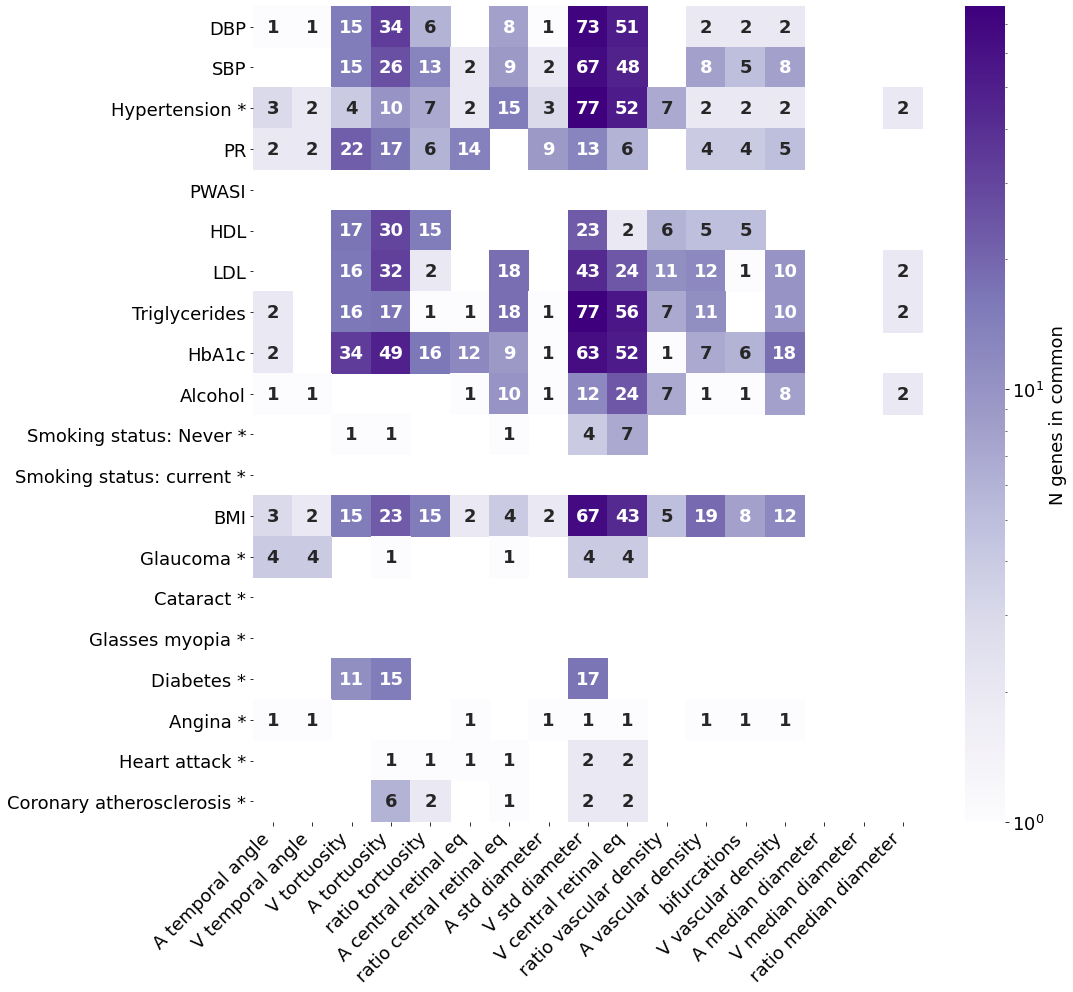

In [63]:
plt.rcParams['font.size'] = '18'

figsize_val_2 = (15, 5) if only_continuos == True else (15, 15)
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]
fig, ax = plt.subplots(figsize=figsize_val_2)




## delte pulse wave asi because there are no genes
#df_file_proper_format_plots = df_file_proper_format_plots.drop(columns=['Pulse wave ASI'])

fig1 = sns.heatmap(df_file_proper_format_plots.T, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots.T).min().max(), 
            vmax=abs(df_file_proper_format_plots.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm())
plt.xticks(rotation=45, ha='right')

# Figure 2: Split between continuous and binary/categ

In [64]:
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]


### filter by continuos and binary:
df_con_auxiliar_plot =  df_inf_csv[df_inf_csv['dtype'] == 'con']
df_cat_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'cat']
list_con_cat_inter = set(list(df_con_auxiliar_plot['final_name']) + list(df_cat_auxiliar_plot['final_name']))&set(list(df_file_proper_format_plots.columns))


df_bin_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'bin']
list_bin_inter=set(list(df_bin_auxiliar_plot['final_name']))&set(list(df_file_proper_format_plots.columns))


df_file_proper_format_plots_con_cat = df_file_proper_format_plots[list_con_cat_inter]
df_file_proper_format_plots_bin = df_file_proper_format_plots[list_bin_inter]

In [77]:
### Reorder, harcoded!:
list_risk_order = ['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides',  'HbA1c', 'Alcohol','BMI'] #hardcoded to be in order
list_binary_order = ['Hypertension *',
 'Smoking status: Never *',
 'Smoking status: current *',
 'Glasses myopia *',
 'Diabetes *',
 'Angina *',
 'Heart attack *',
 'Glaucoma *',
 'Cataract *',
 'Coronary atherosclerosis *']

if len(list_risk_order)==len(list_con_cat_inter)==len(set(list_risk_order) & set(list_con_cat_inter)):
    print('Same size, continue')
    df_file_proper_format_plots_con_cat = df_file_proper_format_plots_con_cat[list_risk_order]
else:
    print('ERROR')

if len(list_bin_inter)==len(list_binary_order)==len(set(list_bin_inter) & set(list_binary_order)):
    print('Same size, continue')
    df_file_proper_format_plots_bin = df_file_proper_format_plots_bin[list_binary_order]

else:
    print('ERROR')

print('Continuous: ', len(list_risk_order), len(list_con_cat_inter), len(set(list_risk_order) & set(list_con_cat_inter)))
print('Binary: ', len(list_bin_inter), len(list_binary_order), len(set(list_bin_inter) & set(list_binary_order)))



Same size, continue
Same size, continue
Continuous:  10 10 10
Binary:  10 10 10


<Figure size 432x288 with 0 Axes>

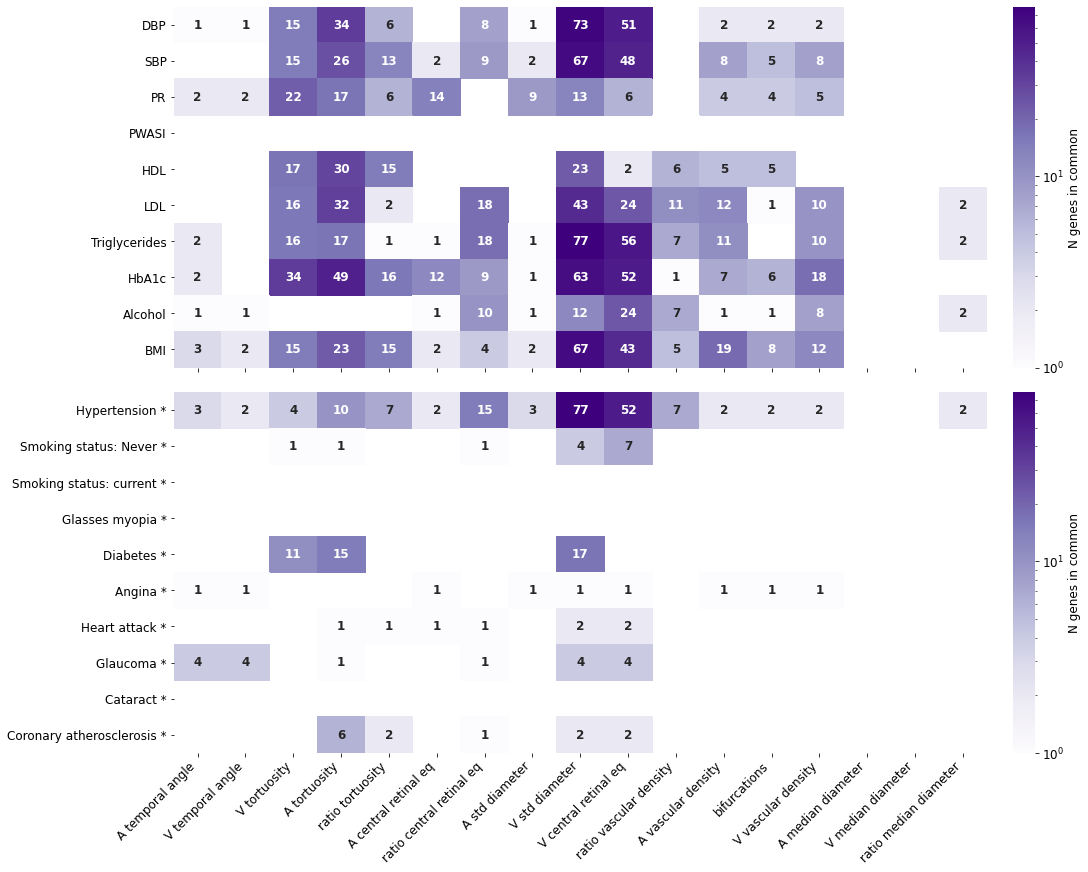

In [80]:
f = plt.figure()
cte_fig=1.5
figsize_val=(10*cte_fig, 8*cte_fig)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize_val, gridspec_kw={'height_ratios': [len(df_file_proper_format_plots_con_cat.T), len(df_file_proper_format_plots_bin.T)]})




plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['font.size'] = '12'

fig1 = sns.heatmap(df_file_proper_format_plots_con_cat.T, annot=True, fmt=".0f", cbar=True, 
            annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots_con_cat.T).min().max(), 
            vmax=abs(df_file_proper_format_plots_con_cat.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm(), ax=ax1)
fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right', visible=False)


fig2 = sns.heatmap(df_file_proper_format_plots_bin.T, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots_bin.T).min().max(), 
            vmax=abs(df_file_proper_format_plots_bin.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm(), ax=ax2)
fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')


f.savefig('/SSD/home/sofia/2023_07_31_continuous_binary_diseases_Pascal.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)
   


# Others:

In [73]:
print(df_genes_neale_intersection.columns)
for i in range(len(df_genes_neale_intersection)):
    print( df_genes_neale_intersection['name_pheno'].iloc[i], df_genes_neale_intersection['name_disease'].iloc[i], df_genes_neale_intersection['name_genes_inters'].iloc[i])


# 6150_2 = angina -> LINC00461
# 6150_1 = Heart attack  -> COL4A1, ARIH2OS, SH2B3, 'ATXN2'
#Glaucoma *,6148_2 -> 'SIX6', 'RP11-1042B17.5', 'C14orf39', 'SIX1'

Index(['name_pheno', 'name_disease', 'len(set_neale)',
       'len(set_pheno_set_neale)', 'name_genes_inters'],
      dtype='object')
mean_angle_taa 4079 {'CTD-2568P8.1'}
mean_angle_taa 4080 set()
mean_angle_taa 6150_4 {'LINC00461', 'CTC-498M16.4', 'CENPW'}
mean_angle_taa 102 {'LINC00461', 'CTC-498M16.4'}
mean_angle_taa 21021 set()
mean_angle_taa 30760 set()
mean_angle_taa 30780 set()
mean_angle_taa 30870 {'STRN', 'CENPW'}
mean_angle_taa 30750 {'STRN', 'CENPW'}
mean_angle_taa 1558 {'LINC00461'}
mean_angle_taa 20116_0 set()
mean_angle_taa 20116_2 set()
mean_angle_taa 21001 {'STRN', 'LINC00461', 'CTC-498M16.4'}
mean_angle_taa 6148_2 {'SIX1', 'C14orf39', 'SIX6', 'RP11-1042B17.5'}
mean_angle_taa 6147_1 set()
mean_angle_taa 2443 set()
mean_angle_taa 6150_2 {'LINC00461'}
mean_angle_taa 6150_1 set()
mean_angle_taa I9_CORATHER set()
mean_angle_tva 4079 {'CTD-2568P8.1'}
mean_angle_tva 4080 set()
mean_angle_tva 6150_4 {'LINC00461', 'CTC-498M16.4'}
mean_angle_tva 102 {'LINC00461', 'CTC-498M16.4'}

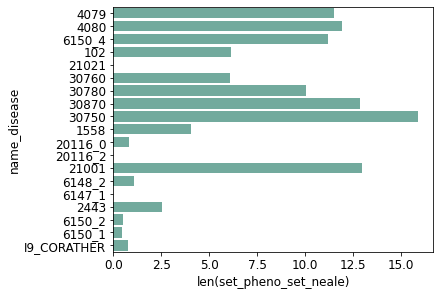

In [74]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [75]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']